### In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
def parser(x):
    return pd.to_datetime('190'+x,format = '%Y-%m')

In [3]:
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv',header=0,parse_dates=[0],
                     index_col=0,squeeze=True,date_parser=parser)

In [4]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

In [5]:
## infer the frequecney -- data cleaning 
series = series.asfreq(pd.infer_freq(series.index))

In [6]:
def check_stationary(ts):
    plt.figure(figsize = (10,4))
    plt.plot(ts)
    plt.ylabel('Sales')
    for year in range(ts.index[0].year,ts.index[-1].year+1):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(ts.mean(), color='r', alpha=0.2, linestyle='--')


Text(0.5, 1.0, 'Sales of shampoo over a three year period')

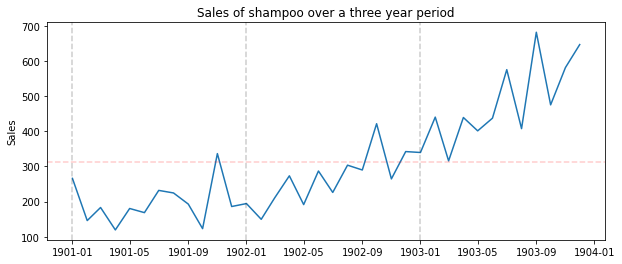

In [7]:
## ploting graph to check stationarity
check_stationary(series)
plt.title(series.name)
## not stationary,seasonal and changing mean 

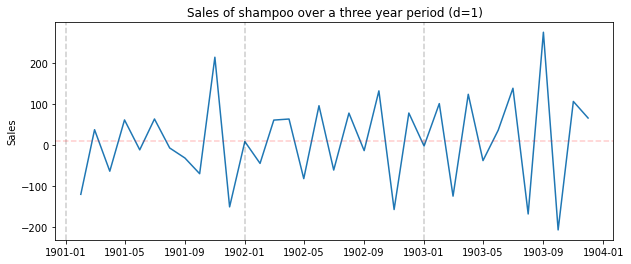

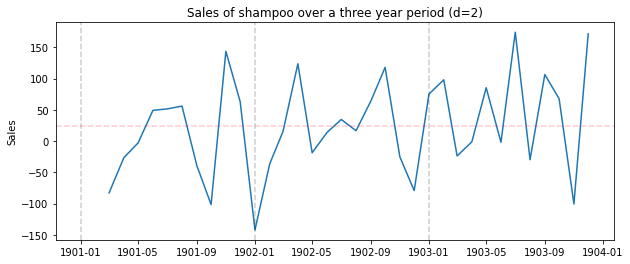

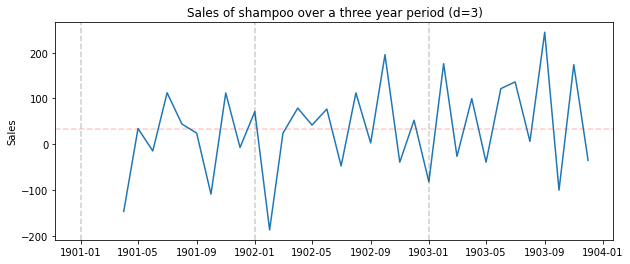

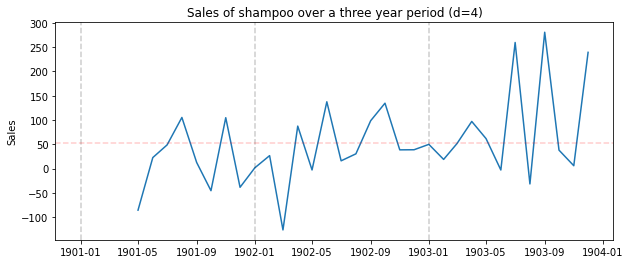

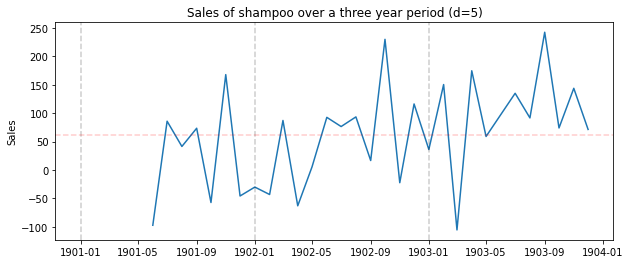

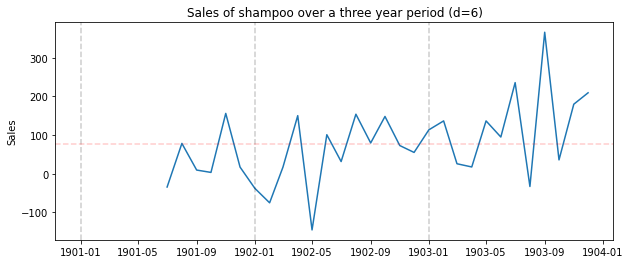

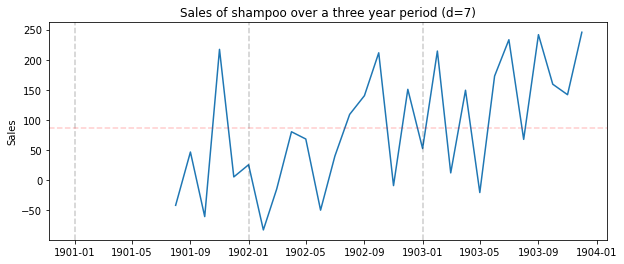

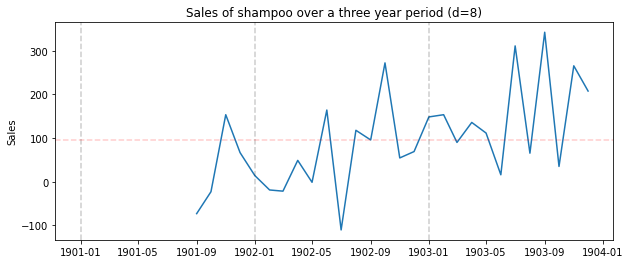

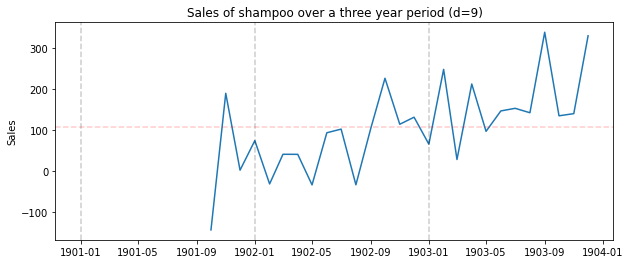

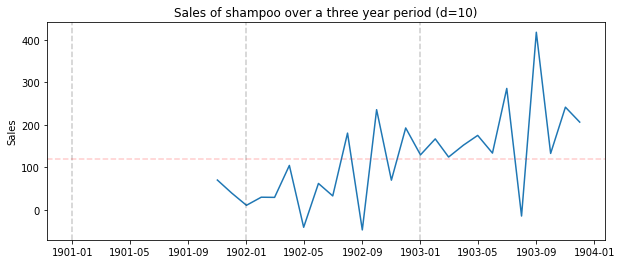

In [8]:
## ploting first,second, and thrid difference to choose d 
for i in range(1,11):
    check_stationary(series.diff(i)[i:])
    plt.title(series.name+f" (d={i})")
## choose d = 1 

In [9]:
newSeries = series.diff(1)[1:]

In [10]:
newSeries 

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Freq: MS, Name: Sales of shampoo over a three year period, dtype: float64

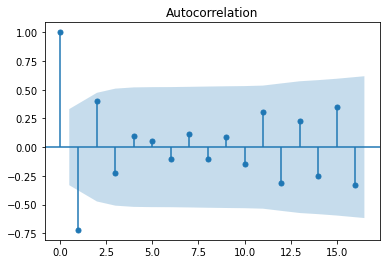

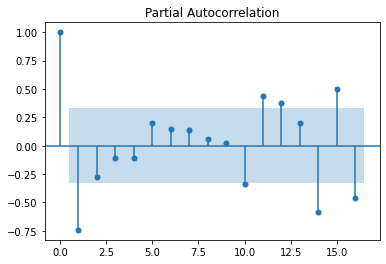

In [11]:
## ploting acf and pcaf to choose p,q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig1 = plot_acf(newSeries)
fig2 = plot_pacf(newSeries)
## choose p=1 ,q =1, seasonal p = 11

In [12]:
## subset data into other vs recent half years
from datetime import timedelta
start_test = pd.to_datetime('1903-07-01')
end_test = pd.to_datetime('1903-12-01')
test_data = series[start_test:]
train_data = series[:start_test-timedelta(days=1)]

In [13]:
## modeling building 
model = ARIMA(train_data,order=(1,1,1),seasonal_order =(1,0,0,11))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   30
Model:                         ARIMA(1, 1, 1)x(1, 0, [], 11)   Log Likelihood                -161.055
Date:                                       Tue, 13 Jul 2021   AIC                            330.110
Time:                                               17:02:20   BIC                            335.579
Sample:                                           01-01-1901   HQIC                           331.823
                                                - 06-01-1903                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4757      0.305     -1.561      0.119      -1.073       0.122
ma.L1         -0.4112      0.312     -1.318      0.188      -1.023       0.200
ar.S.L11       0.2992      0.255      1.175      0.240      -0.200       0.798
sigma2      3668.0462   1201.388      3.053      0.002    1313.370    6022.723
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.72   Prob(JB):                         0.73
Heteroskedasticity (H):               0.82   Skew:                             0.17
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
## get pred result
pred = res.predict(start = start_test, end = end_test)
error = test_data - pred

In [15]:
pred

1903-07-01    420.971342
1903-08-01    435.731950
1903-09-01    466.160504
1903-10-01    423.429467
1903-11-01    444.674260
1903-12-01    444.862274
Freq: MS, Name: predicted_mean, dtype: float64

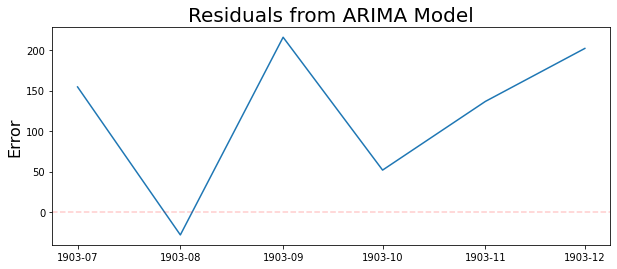

In [16]:
plt.figure(figsize=(10,4))
plt.plot(error)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

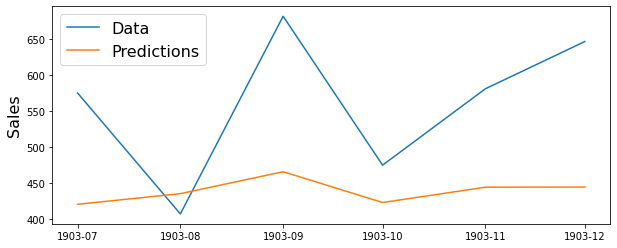

In [17]:

plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.ylabel('Sales', fontsize=16)

In [18]:
## model evaluation 

np.sqrt(mean_squared_error(test_data , pred))

149.12723221059824

### rolling forcast origin

In [19]:
## using rolling forcast origin to build the model 
rolling_pred = pd.Series(dtype=np.float64)
for train_end in test_data.index:
    model = ARIMA(series[:train_end-timedelta(days=1)],order=(1,1,1),seasonal_order =(1,0,0,11))
    res = model.fit()
    rolling_pred = pd.concat([rolling_pred,res.forecast()])

In [20]:
rolling_pred

1903-07-01    420.971342
1903-08-01    466.565816
1903-09-01    548.580996
1903-10-01    448.507665
1903-11-01    577.603715
1903-12-01    540.460900
Freq: MS, dtype: float64

In [21]:
error = test_data - rolling_pred

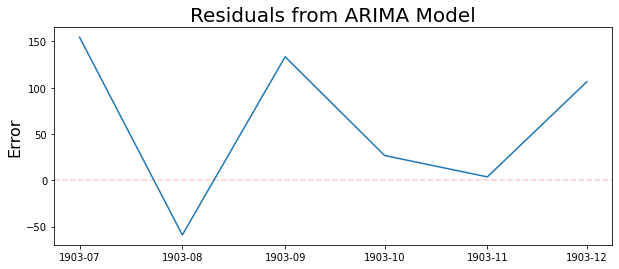

In [22]:
plt.figure(figsize=(10,4))
plt.plot(error)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

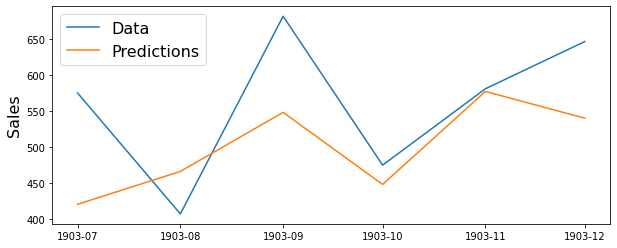

In [23]:

plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(rolling_pred)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.ylabel('Sales', fontsize=16)

In [24]:
## model evaluation 

np.sqrt(mean_squared_error(test_data , rolling_pred))

97.65370627621401